In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap


# Function

In [20]:
def kmeans_init_centroids(X, K):
    # Khoi tao centroids ban dau
    return X[np.random.choice(X.shape[0], K)]

def kmeans_assign_labels(X, centroids):
    D = cdist(X, centroids)
    return np.argmin(D, axis = 1)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centroids[k, :] = np.mean(Xk, axis=0)
    return centroids

def has_coverged (centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

In [21]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0

    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_coverged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

In [22]:
def kmeans_display(X, label):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    kwargs = {"markersize": 6, "alpha": .8, "markeredgecolor": 'k'}
    plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.plot()
    plt.show()


In [23]:
def kmeans_display_with_regions(X, labels_final, centroids_final):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels_final)

    # Vẽ điểm theo nhãn
    X0 = X[labels_final == 0, :]
    X1 = X[labels_final == 1, :]
    X2 = X[labels_final == 2, :]

    kwargs = {"markersize": 6, "alpha": .8, "markeredgecolor": 'k'}
    plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

    # Vẽ các centroid với hình tương ứng
    centroid_markers = ['^', 'o', 's']  # tam giác, tròn, vuông
    for i, centroid in enumerate(centroids_final):
        plt.plot(centroid[0], centroid[1], color='yellow', marker=centroid_markers[i],
                 markersize=14, markeredgecolor='black', markeredgewidth=1.5)

    # Vùng phân cụm (decision boundaries)
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = kmeans_assign_labels(np.c_[xx.ravel(), yy.ravel()], centroids_final)
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    plt.title("K-Means Clustering with Distinct Centroid Shapes")
    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.legend()
    plt.show()


### Assignment 1 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

In [24]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

N = 200 
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

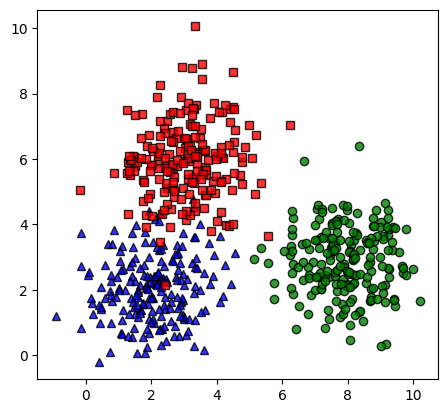

In [25]:
kmeans_display(X, original_label)

In [26]:
centroids, labels, it = kmeans(X, K)

In [27]:
centroids[-1]

array([[3.05765008, 5.95537444],
       [7.91291981, 2.88753032],
       [2.03288506, 1.99063973]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


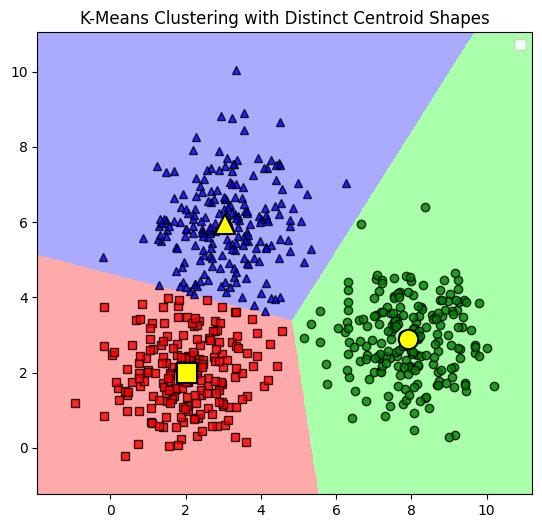

In [28]:
kmeans_display_with_regions(X, np.array(labels[-1]), np.array(centroids[-1]))

### Assignment 2 (2 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

In [29]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, 50)
X1 = np.random.multivariate_normal(means[1], cov, 20)
X2 = np.random.multivariate_normal(means[2], cov, 1000)

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = np.asarray([0]*50 + [1]*20 + [2]*1000).T

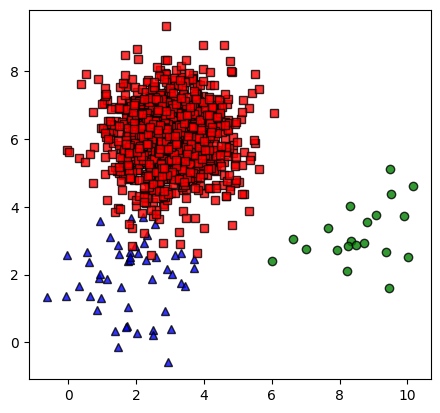

In [30]:
kmeans_display(X, original_label)

In [31]:
centroids, labels, it = kmeans(X, K)
centroids[-1]

array([[2.17605985, 2.99179098],
       [4.40999992, 5.54929394],
       [2.60596003, 6.30176926]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


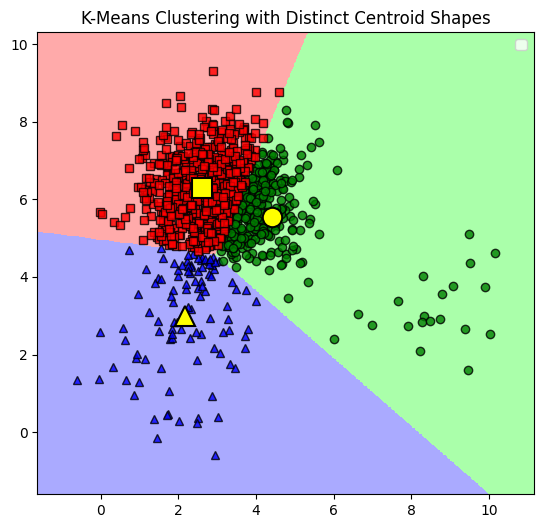

In [32]:
kmeans_display_with_regions(X, np.array(labels[-1]), np.array(centroids[-1]))

### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [33]:
means = [[2, 2], [8, 3], [3, 6]]
cov1 = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, 1]]

N = 200

X0 = np.random.multivariate_normal(means[0], cov1, N)
X1 = np.random.multivariate_normal(means[1], cov1, N)
X2 = np.random.multivariate_normal(means[2], cov2, N)

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

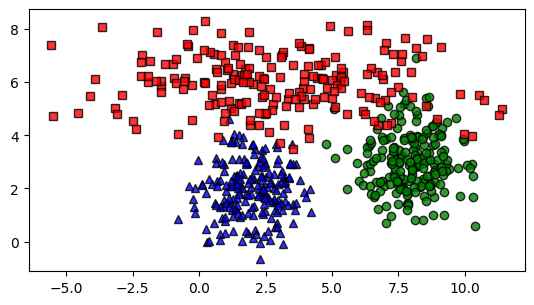

In [34]:
kmeans_display(X, original_label)

In [35]:
centroids, labels, it = kmeans(X, K)
centroids[-1]

array([[1.99682253, 1.95807696],
       [7.79620496, 3.62423704],
       [1.30825572, 6.04331677]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


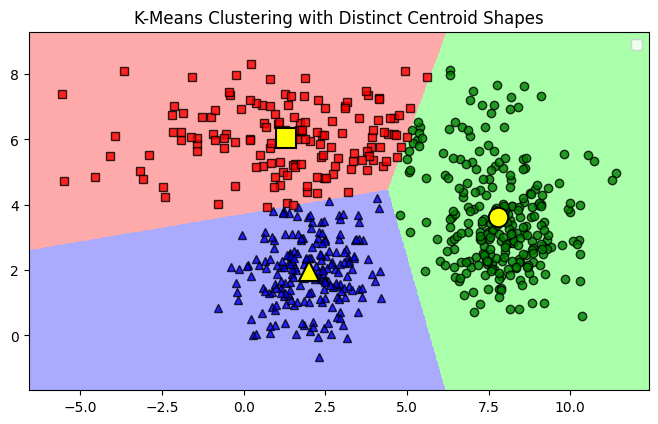

In [36]:
kmeans_display_with_regions(X, np.array(labels[-1]), np.array(centroids[-1]))